In [ ]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 769.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 590.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow

In [ ]:
!pip install tensorflow-io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 22.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tensorflow-io

In [ ]:
pip install keras

In [ ]:
pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 14.7 MB/s eta 0:00:00


In [ ]:
import os
import librosa
import librosa.display as lid
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import psutil
cmap=plt.get_cmap('viridis')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class CFG:
    seed = 42
    img_size = [128, 384]
    batch_size = 64
    duration = 15
    sample_rate = 32000
    audio_len = duration * sample_rate
    nfft = 2028
    window = 2048
    hop_length = audio_len // (img_size[1] - 1)
    fmin = 20
    fmax = 16000
    epochs = 5
    preset = 'efficientnetv2_b2_imagenet'
    augment = True
    class_names = sorted(os.listdir('/content/drive/MyDrive/train_audio'))
    num_classes = len(class_names)
    class_labels = list(range(num_classes))
    label2name = dict(zip(class_labels, class_names))
    name2label = {v: k for k, v in label2name.items()}

In [ ]:
print(CFG.class_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181]


In [ ]:
print(CFG.label2name.items())

dict_items([(0, 'asbfly'), (1, 'ashdro1'), (2, 'ashpri1'), (3, 'ashwoo2'), (4, 'asikoe2'), (5, 'asiope1'), (6, 'aspfly1'), (7, 'aspswi1'), (8, 'barfly1'), (9, 'barswa'), (10, 'bcnher'), (11, 'bkcbul1'), (12, 'bkrfla1'), (13, 'bkskit1'), (14, 'bkwsti'), (15, 'bladro1'), (16, 'blaeag1'), (17, 'blakit1'), (18, 'blhori1'), (19, 'blnmon1'), (20, 'blrwar1'), (21, 'bncwoo3'), (22, 'brakit1'), (23, 'brasta1'), (24, 'brcful1'), (25, 'brfowl1'), (26, 'brnhao1'), (27, 'brnshr'), (28, 'brodro1'), (29, 'brwjac1'), (30, 'brwowl1'), (31, 'btbeat1'), (32, 'bwfshr1'), (33, 'categr'), (34, 'chbeat1'), (35, 'cohcuc1'), (36, 'comfla1'), (37, 'comgre'), (38, 'comior1'), (39, 'comkin1'), (40, 'commoo3'), (41, 'commyn'), (42, 'compea'), (43, 'comros'), (44, 'comsan'), (45, 'comtai1'), (46, 'copbar1'), (47, 'crbsun2'), (48, 'cregos1'), (49, 'crfbar1'), (50, 'crseag1'), (51, 'dafbab1'), (52, 'darter2'), (53, 'eaywag1'), (54, 'emedov2'), (55, 'eucdov'), (56, 'eurbla2'), (57, 'eurcoo'), (58, 'forwag1'), (59, 'ga

In [ ]:
print(CFG.name2label.items())

dict_items([('asbfly', 0), ('ashdro1', 1), ('ashpri1', 2), ('ashwoo2', 3), ('asikoe2', 4), ('asiope1', 5), ('aspfly1', 6), ('aspswi1', 7), ('barfly1', 8), ('barswa', 9), ('bcnher', 10), ('bkcbul1', 11), ('bkrfla1', 12), ('bkskit1', 13), ('bkwsti', 14), ('bladro1', 15), ('blaeag1', 16), ('blakit1', 17), ('blhori1', 18), ('blnmon1', 19), ('blrwar1', 20), ('bncwoo3', 21), ('brakit1', 22), ('brasta1', 23), ('brcful1', 24), ('brfowl1', 25), ('brnhao1', 26), ('brnshr', 27), ('brodro1', 28), ('brwjac1', 29), ('brwowl1', 30), ('btbeat1', 31), ('bwfshr1', 32), ('categr', 33), ('chbeat1', 34), ('cohcuc1', 35), ('comfla1', 36), ('comgre', 37), ('comior1', 38), ('comkin1', 39), ('commoo3', 40), ('commyn', 41), ('compea', 42), ('comros', 43), ('comsan', 44), ('comtai1', 45), ('copbar1', 46), ('crbsun2', 47), ('cregos1', 48), ('crfbar1', 49), ('crseag1', 50), ('dafbab1', 51), ('darter2', 52), ('eaywag1', 53), ('emedov2', 54), ('eucdov', 55), ('eurbla2', 56), ('eurcoo', 57), ('forwag1', 58), ('gargan

In [ ]:
BASE_PATH = '/content/drive/MyDrive'

In [ ]:
df=pd.read_csv('/content/train_metadata.csv')
df.head(1)

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg


In [ ]:
df['filepath'] = BASE_PATH + '/train_audio/' + df.filename
df['target'] = df.primary_label.map(CFG.name2label)
df['filename'] = df.filepath.map(lambda x: x.split('/')[-1])
df['xc_id'] = df.filepath.map(lambda x: x.split('/')[-1].split('.')[0])

In [ ]:
df.head(1)


,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,filepath,target,xc_id
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,XC134896.ogg,/content/drive/MyDrive/train_audio/asbfly/XC13...,0,XC134896


In [ ]:
def load_audio(filepath):
    if not os.path.exists(filepath):
        print(f"File not found: {filepath}")
        return None, None
    try:
        audio, sr = librosa.load(filepath, sr=CFG.sample_rate, duration=5.0)
        return audio, sr
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None, None

In [ ]:
def get_spectrogram(audio):
    spec = librosa.feature.melspectrogram(y=audio,
                                          sr=CFG.sample_rate,
                                          n_mels=256,
                                          n_fft=2048,
                                          hop_length=512,
                                          fmax=CFG.fmax,
                                          fmin=CFG.fmin)
    spec = librosa.power_to_db(spec, ref=1.0)
    min_ = spec.min()
    max_ = spec.max()
    if max_ != min_:
        spec = (spec - min_) / (max_ - min_)
    return spec

In [ ]:
def display_audio(row):
    print(f"Processing {row.filepath}...")
    audio, sr = load_audio(row.filepath)
    if audio is None:
        return
    spec = get_spectrogram(audio)
    fig, ax = plt.subplots(2, 1, figsize=(12, 2 * 3), sharex=True, tight_layout=True)
    fig.suptitle(f"ID: {row.filename} | Name: {row.common_name} | Sci.name: {row.scientific_name} | Rating: {row.rating}")
    lid.waveshow(audio, sr=CFG.sample_rate, ax=ax[0], color=cmap(0.1))
    lid.specshow(spec, sr=CFG.sample_rate,
                 hop_length=512,
                 n_fft=2048,
                 fmin=CFG.fmin,
                 fmax=CFG.fmax,
                 x_axis='time',
                 y_axis="mel",
                 cmap="coolwarm", ax=ax[1])
    ax[0].set_xlabel('')
    plt.show()

Memory usage before processing: 169.19 MB
Processing /content/drive/MyDrive/train_audio/asbfly/XC49755.ogg...


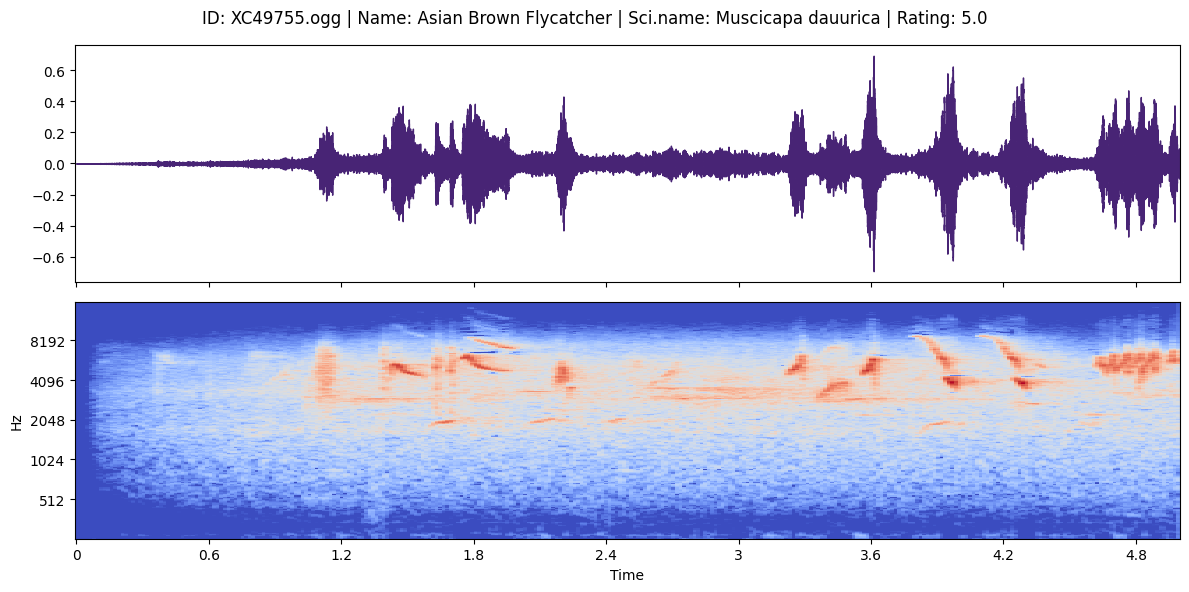

Memory usage after processing: 382.86 MB


In [ ]:
process = psutil.Process(os.getpid())
memory_before = process.memory_info().rss
print(f"Memory usage before processing: {memory_before / 1024 ** 2:.2f} MB")

row = df.iloc[35]
display_audio(row)

memory_after = process.memory_info().rss
print(f"Memory usage after processing: {memory_after / 1024 ** 2:.2f} MB")

In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(df, test_size=0.2)
print(f"Num Train: {len(train_df)} | Num Valid: {len(valid_df)}")

Num Train: 19567 | Num Valid: 4892


In [ ]:

import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras_cv
import keras
import keras.backend as K
import tensorflow as tf
import tensorflow_io as tfio

import numpy as np
import pandas as pd

from glob import glob
from tqdm import tqdm

import librosa
import IPython.display as ipd
import librosa.display as lid

import matplotlib.pyplot as plt
import matplotlib as mpl

cmap = mpl.cm.get_cmap('coolwarm')
import warnings
warnings.filterwarnings('ignore')

<ipython-input-21-3705d86abf8b>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('coolwarm')


In [ ]:
def build_decoder(with_labels=True, dim=1024):
    def get_audio(filepath):
        file_bytes = tf.io.read_file(filepath)
        audio = tfio.audio.decode_vorbis(file_bytes)
        audio = tf.cast(audio, tf.float32)
        if tf.shape(audio)[1] > 1:
            audio = audio[..., 0:1]
        audio = tf.squeeze(audio, axis=-1)
        return audio

    def crop_or_pad(audio, target_len, pad_mode="constant"):
        audio_len = tf.shape(audio)[0]
        diff_len = abs(
            target_len - audio_len
        )
        if audio_len < target_len:
            pad1 = tf.random.uniform([], maxval=diff_len, dtype=tf.int32)
            pad2 = diff_len - pad1
            audio = tf.pad(audio, paddings=[[pad1, pad2]], mode=pad_mode)
        elif audio_len > target_len:
            idx = tf.random.uniform([], maxval=diff_len, dtype=tf.int32)
            audio = audio[idx : (idx + target_len)]
        return tf.reshape(audio, [target_len])

    def apply_preproc(spec):

        mean = tf.math.reduce_mean(spec)
        std = tf.math.reduce_std(spec)
        spec = tf.where(tf.math.equal(std, 0), spec - mean, (spec - mean) / std)


        min_val = tf.math.reduce_min(spec)
        max_val = tf.math.reduce_max(spec)
        spec = tf.where(
            tf.math.equal(max_val - min_val, 0),
            spec - min_val,
            (spec - min_val) / (max_val - min_val),
        )
        return spec

    def get_target(target):
        target = tf.reshape(target, [1])
        target = tf.cast(tf.one_hot(target, CFG.num_classes), tf.float32)
        target = tf.reshape(target, [CFG.num_classes])
        return target

    def decode(path):

        audio = get_audio(path)

        audio = crop_or_pad(audio, dim)

        spec = keras.layers.MelSpectrogram(
            num_mel_bins=CFG.img_size[0],
            fft_length=CFG.nfft,
            sequence_stride=CFG.hop_length,
            sampling_rate=CFG.sample_rate,
        )(audio)

        spec = apply_preproc(spec)

        spec = tf.tile(spec[..., None], [1, 1, 3])
        spec = tf.reshape(spec, [*CFG.img_size, 3])
        return spec

    def decode_with_labels(path, label):
        label = get_target(label)
        return decode(path), label

    return decode_with_labels if with_labels else decode

In [ ]:
def build_augmenter():
    augmenters = [
        keras_cv.layers.MixUp(alpha=0.4),
        keras_cv.layers.RandomCutout(height_factor=(1.0, 1.0),
                                     width_factor=(0.06, 0.12)), # time-masking
        keras_cv.layers.RandomCutout(height_factor=(0.06, 0.1),
                                     width_factor=(1.0, 1.0)), # freq-masking
    ]

    def augment(img, label):
        data = {"images":img, "labels":label}
        for augmenter in augmenters:
            if tf.random.uniform([]) < 0.35:
                data = augmenter(data, training=True)
        return data["images"], data["labels"]

    return augment

In [ ]:
def build_dataset(paths, labels=None, batch_size=32,
                  decode_fn=None, augment_fn=None, cache=True,
                  augment=False, shuffle=2048):

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None, dim=CFG.audio_len)

    if augment_fn is None:
        augment_fn = build_augmenter()

    AUTO = tf.data.experimental.AUTOTUNE
    slices = (paths,) if labels is None else (paths, labels)
    ds = tf.data.Dataset.from_tensor_slices(slices)
    ds = ds.map(decode_fn, num_parallel_calls=AUTO)
    ds = ds.cache() if cache else ds
    if shuffle:
        opt = tf.data.Options()
        ds = ds.shuffle(shuffle, seed=CFG.seed)
        opt.experimental_deterministic = False
        ds = ds.with_options(opt)
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.map(augment_fn, num_parallel_calls=AUTO) if augment else ds
    ds = ds.prefetch(AUTO)
    return ds

In [ ]:
train_paths = train_df.filepath.values
train_labels = train_df.target.values
train_ds = build_dataset(train_paths, train_labels, batch_size=CFG.batch_size,
                         shuffle=True, augment=CFG.augment)

# Valid
valid_paths = valid_df.filepath.values
valid_labels = valid_df.target.values
valid_ds = build_dataset(valid_paths, valid_labels, batch_size=CFG.batch_size,
                         shuffle=False, augment=False)

In [ ]:
def plot_batch(batch, row=3, col=3, label2name=None,):
    """Plot one batch data"""
    if isinstance(batch, tuple) or isinstance(batch, list):
        specs, tars = batch
    else:
        specs = batch
        tars = None
    plt.figure(figsize=(col*5, row*3))
    for idx in range(row*col):
        ax = plt.subplot(row, col, idx+1)
        lid.specshow(np.array(specs[idx, ..., 0]),
                     n_fft=CFG.nfft,
                     hop_length=CFG.hop_length,
                     sr=CFG.sample_rate,
                     x_axis='time',
                     y_axis='mel',
                     cmap='coolwarm')
        if tars is not None:
            label = tars[idx].numpy().argmax()
            name = label2name[label]
            plt.title(name)
    plt.tight_layout()
    plt.show()

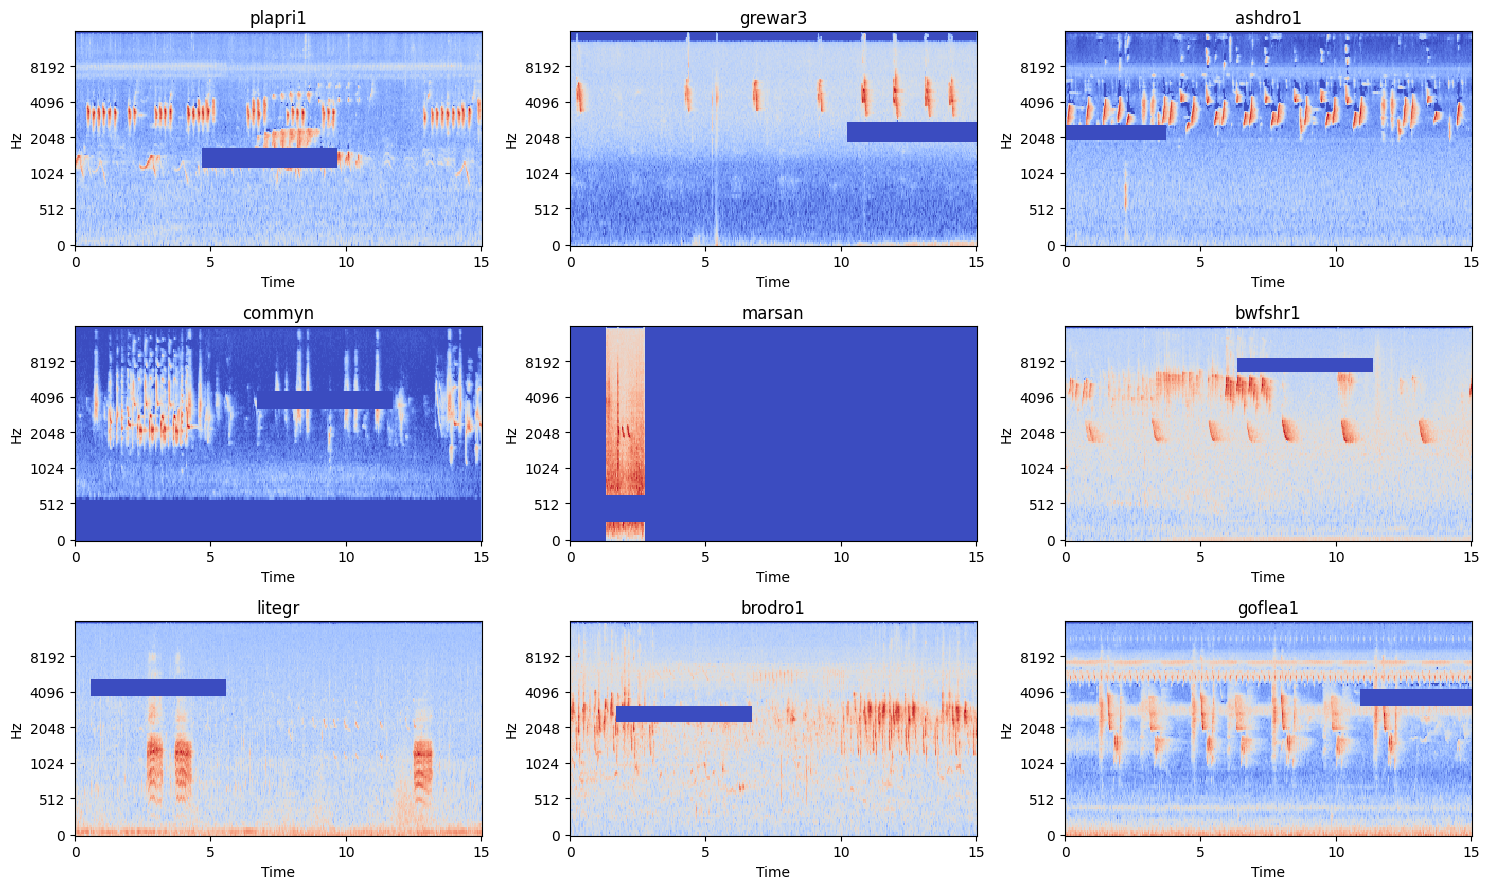

In [ ]:
sample_ds = train_ds.take(100)
batch = next(iter(sample_ds))
plot_batch(batch, label2name=CFG.label2name)

In [ ]:
inp = keras.layers.Input(shape=(None, None, 3))
# Pretrained backbone
backbone = keras_cv.models.EfficientNetV2Backbone.from_preset(
    CFG.preset,
)
out = keras_cv.models.ImageClassifier(
    backbone=backbone,
    num_classes=CFG.num_classes,
    name="classifier"
)(inp)
# Build model
model = keras.models.Model(inputs=inp, outputs=out)
# Compile model with optimizer, loss and metrics
model.compile(optimizer="adam",
              loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.02),
              metrics=[keras.metrics.AUC(name='auc')],
             )
model.summary()

100%|██████████| 1.79k/1.79k [00:00<00:00, 2.99MB/s]


100%|██████████| 34.2M/34.2M [00:00<00:00, 94.9MB/s]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifier (ImageClassifier)         │ (None, 182)                 │       9,025,812 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,025,812 (34.43 MB)

 Trainable params: 8,943,524 (34.12 MB)

 Non-trainable params: 82,288 (321.44 KB)

In [ ]:

import math

def get_lr_callback(batch_size=8, mode='cos', epochs=10, plot=False):
    lr_start, lr_max, lr_min = 5e-5, 8e-6 * batch_size, 1e-5
    lr_ramp_ep, lr_sus_ep, lr_decay = 3, 0, 0.75

    def lrfn(epoch):  # Learning rate update function
        if epoch < lr_ramp_ep: lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep: lr = lr_max
        elif mode == 'exp': lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        elif mode == 'step': lr = lr_max * lr_decay**((epoch - lr_ramp_ep - lr_sus_ep) // 2)
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min
        return lr

    if plot:  # Plot lr curve if plot is True
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('epoch'); plt.ylabel('lr')
        plt.title('LR Scheduler')
        plt.show()

    return keras.callbacks.LearningRateScheduler(lrfn, verbose=False)  # Create lr callback

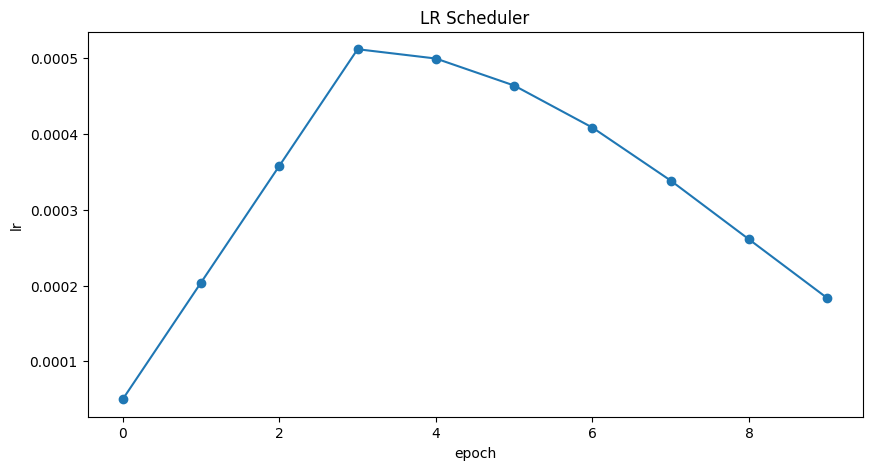

In [ ]:
lr_cb = get_lr_callback(CFG.batch_size, plot=True)

In [ ]:
model.load_weights("/content/drive/MyDrive/best_model.weights.h5")

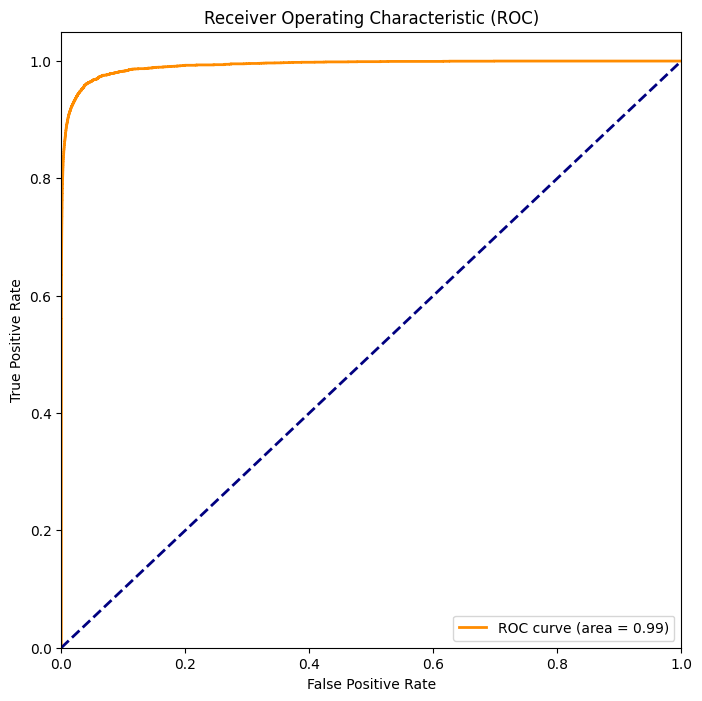

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_auc_roc(model, valid_ds):
    # Get true labels and predictions
    y_true = []
    y_pred = []

    for batch in valid_ds:
        images, labels = batch
        predictions = model.predict(images, verbose=0)
        y_true.extend(labels.numpy())
        y_pred.extend(predictions)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Plot AUC-ROC curve
plot_auc_roc(model, valid_ds)


In [ ]:
ckpt_cb = keras.callbacks.ModelCheckpoint("best_model.weights.h5",
                                         monitor='val_auc',
                                         save_best_only=True,
                                         save_weights_only=True,
                                         mode='max')

In [ ]:
# history = model.fit(
#     train_ds,
#     validation_data=valid_ds,
#     epochs=5,
#     callbacks=[lr_cb, ckpt_cb],
#     verbose=1
# )

In [ ]:

# best_epoch = np.argmax(history.history["val_auc"])
# best_score = history.history["val_auc"][best_epoch]
# print('>>> Best AUC: ', best_score)
# print('>>> Best Epoch: ', best_epoch+1)

In [ ]:
eval_results=model.evaluate(valid_ds)
loss = eval_results[0]
accuracy = eval_results[1]

76/76 ━━━━━━━━━━━━━━━━━━━━ 49s 607ms/step - auc: 0.9790 - loss: 1.1964


In [ ]:
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Loss: 1.1916184425354004
Accuracy: 0.9804531335830688


In [ ]:
  def predict_new_audio(filepath, cfg, model):
    def get_audio(filepath):
        file_bytes = tf.io.read_file(filepath)
        audio = tfio.audio.decode_vorbis(file_bytes)
        audio = tf.cast(audio, tf.float32)
        if tf.shape(audio)[1] > 1:
            audio = audio[..., 0:1]
        audio = tf.squeeze(audio, axis=-1)
        return audio

    def crop_or_pad(audio, target_len, pad_mode="constant"):
        audio_len = tf.shape(audio)[0]
        diff_len = abs(target_len - audio_len)
        if audio_len < target_len:
            pad1 = tf.random.uniform([], maxval=diff_len, dtype=tf.int32)
            pad2 = diff_len - pad1
            audio = tf.pad(audio, paddings=[[pad1, pad2]], mode=pad_mode)
        elif audio_len > target_len:
            idx = tf.random.uniform([], maxval=diff_len, dtype=tf.int32)
            audio = audio[idx: (idx + target_len)]
        return tf.reshape(audio, [target_len])

    def apply_preproc(spec):
        mean = tf.math.reduce_mean(spec)
        std = tf.math.reduce_std(spec)
        spec = tf.where(tf.math.equal(std, 0), spec - mean, (spec - mean) / std)

        min_val = tf.math.reduce_min(spec)
        max_val = tf.math.reduce_max(spec)
        spec = tf.where(tf.math.equal(max_val - min_val, 0), spec - min_val, (spec - min_val) / (max_val - min_val))
        return spec

    audio = get_audio(filepath)
    audio = crop_or_pad(audio, cfg.audio_len)

    spec = keras.layers.MelSpectrogram(
        num_mel_bins=cfg.img_size[0],
        fft_length=cfg.nfft,
        sequence_stride=cfg.hop_length,
        sampling_rate=cfg.sample_rate,
    )(audio)

    spec = apply_preproc(spec)
    spec = tf.tile(spec[..., None], [1, 1, 3])
    spec = tf.reshape(spec, [*cfg.img_size, 3])
    spec = tf.expand_dims(spec, axis=0)

    predictions = model.predict(spec)
    predicted_class = tf.argmax(predictions, axis=-1).numpy()[0]

    return predicted_class


new_audio_path = '/content/sample1.ogg'
predicted_class = predict_new_audio(new_audio_path, CFG, model)
predicted_class_name = CFG.label2name[predicted_class]

print(f'Predicted class: {predicted_class_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted class: asbfly
